# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
pip install citipy

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
from pprint import pprint 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                         "Lat": city_lat,
                        "Lng": city_lng,
                         "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | semdinli
Processing Record 12 of Set 1 | shimoda
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | canutama
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | fort st. john
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | susuman
Processing Record 22 of Set 1 | karg

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fale old settlement,-9.3852,-171.2468,28.30,74,100,7.44,TK,1723166134
1,kodiak,57.7900,-152.4072,12.73,82,100,2.57,US,1723166135
2,grytviken,-54.2811,-36.5092,-15.48,76,15,6.55,GS,1723166136
3,adamstown,-25.0660,-130.1015,22.34,78,100,12.38,PN,1723166138
4,port mathurin,-19.6833,63.4167,22.49,73,54,9.54,MU,1723166139


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,28.30,74,100,7.44,TK,1723166134
1,kodiak,57.7900,-152.4072,12.73,82,100,2.57,US,1723166135
2,grytviken,-54.2811,-36.5092,-15.48,76,15,6.55,GS,1723166136
3,adamstown,-25.0660,-130.1015,22.34,78,100,12.38,PN,1723166138
4,port mathurin,-19.6833,63.4167,22.49,73,54,9.54,MU,1723166139


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

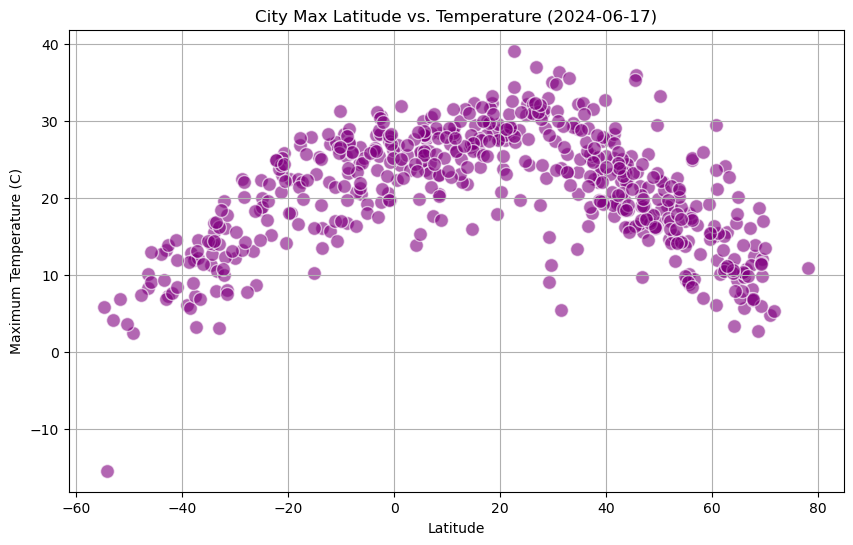

In [89]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='purple', alpha=0.6, edgecolors='w', s=100)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("WeatherPy_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

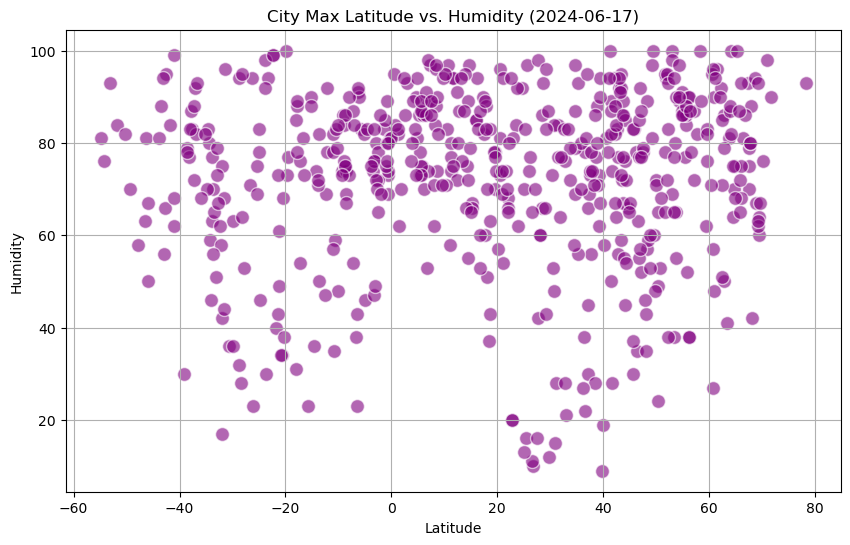

In [90]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='purple', alpha=0.6, edgecolors='w', s=100)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("WeatherPy_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

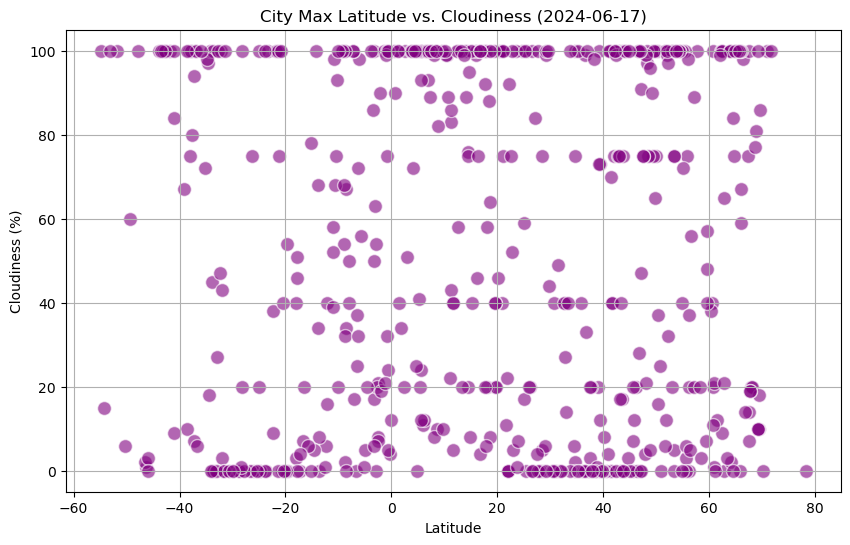

In [91]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='purple', alpha=0.6, edgecolors='w', s=100)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("WeatherPy_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

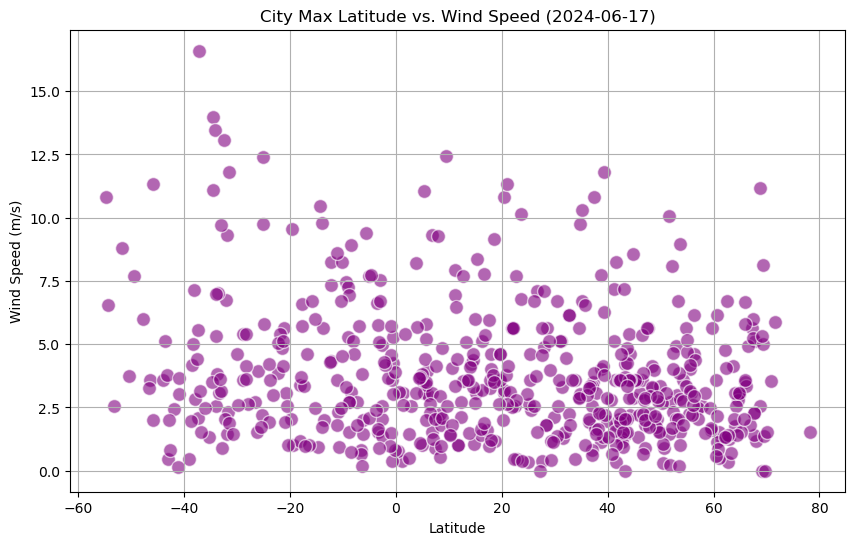

In [92]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='purple', alpha=0.6, edgecolors='w', s=100)


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("WeatherPy_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df["Max Temp"])

In [52]:
slope

0.0077678688507739355

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,12.73,82,100,2.57,US,1723166135
5,constantia,44.1833,28.6500,18.38,76,0,2.21,RO,1723166140
9,bethel,41.3712,-73.4140,19.64,89,100,3.60,US,1723166145
10,semdinli,37.3051,44.5742,18.02,69,0,3.49,TR,1723166146
11,shimoda,34.6667,138.9500,32.28,69,2,2.90,JP,1723166147


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fale old settlement,-9.3852,-171.2468,28.30,74,100,7.44,TK,1723166134
2,grytviken,-54.2811,-36.5092,-15.48,76,15,6.55,GS,1723166136
3,adamstown,-25.0660,-130.1015,22.34,78,100,12.38,PN,1723166138
4,port mathurin,-19.6833,63.4167,22.49,73,54,9.54,MU,1723166139
6,blackmans bay,-43.0167,147.3167,13.18,56,100,0.45,AU,1723166141


###  Temperature vs. Latitude Linear Regression Plot

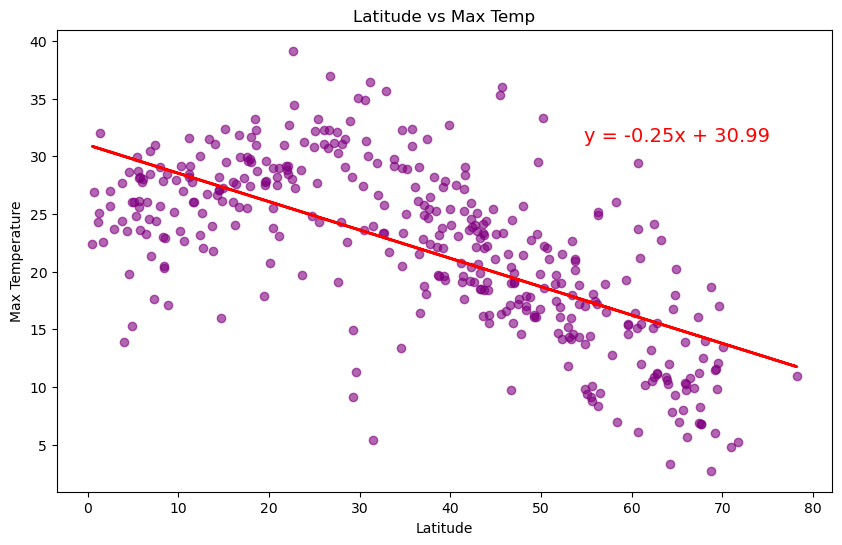

In [61]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

# Perform linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(x.max() * 0.7, y.max() * 0.8, slope_text, fontsize=14, color='red')


# Show the plot
plt.show()

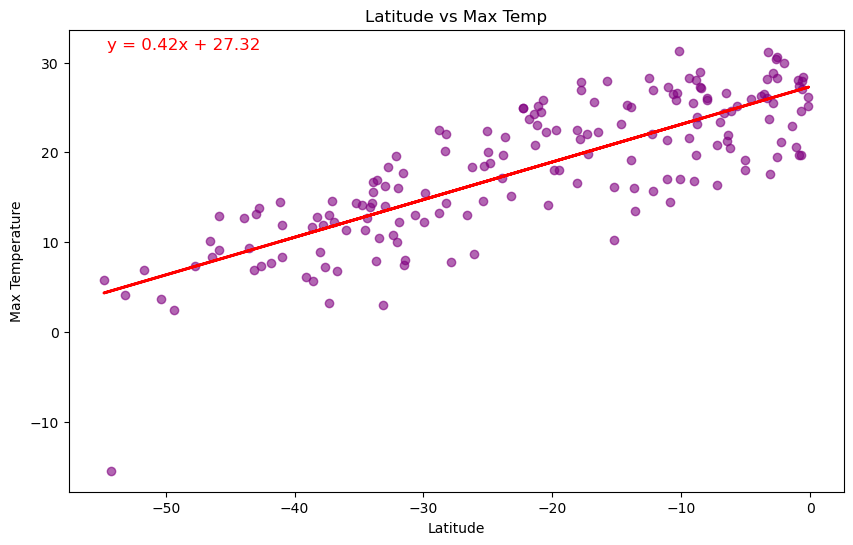

In [74]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Perform linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"

# Slope text modified to be included in the top left section of the graph 
plt.annotate(slope_text, 
             xy=(0.05, 0.95),  
             xycoords='axes fraction', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             ha='left', 
             va='bottom')

# Show the plot
plt.show()

**Discussion about the linear relationship:** Based on the above data visualization charts, it seems clearly evident that there is a positive correlation between a city's latitude and the max temperature of aforementioned city. Conversely, there appears to be a negative correlation regarding max city and the city's distance away from the equator. 

### Humidity vs. Latitude Linear Regression Plot

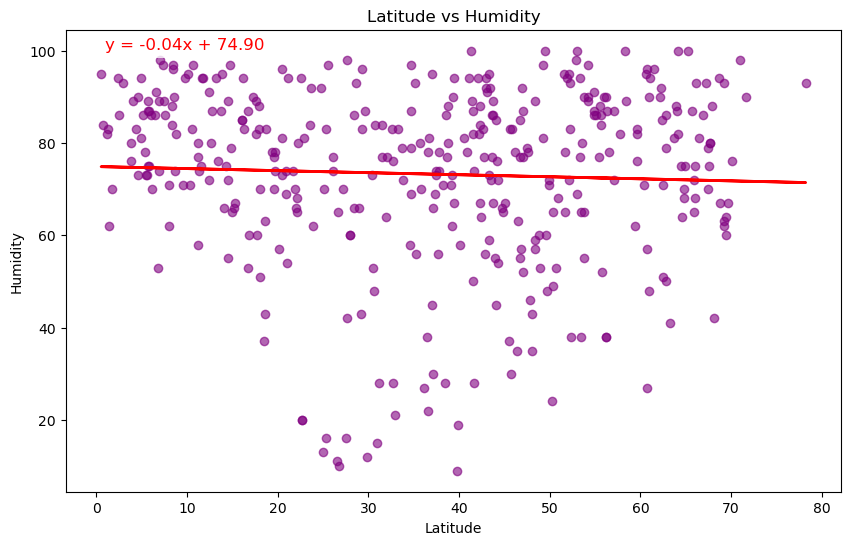

In [79]:
# Linear regression Humidity and Latitude on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

# Performing linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(slope_text, 
             xy=(0.05, 0.95),  
             xycoords='axes fraction', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             ha='left', 
             va='bottom')

# Show the plot
plt.show()

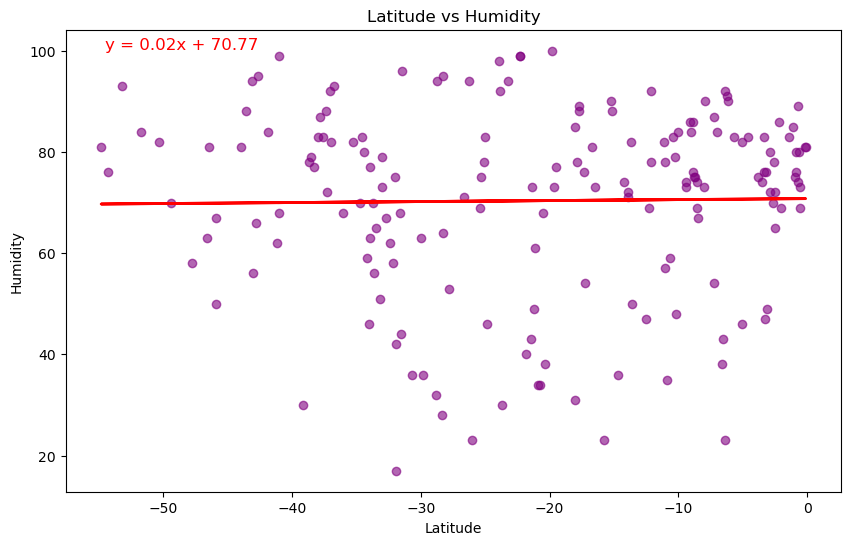

In [80]:
# Linear regression Humidity and Latitude on Northern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Perform linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(slope_text, 
             xy=(0.05, 0.95),  
             xycoords='axes fraction', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             ha='left', 
             va='bottom')

# Show the plot
plt.show()

**Discussion about the linear relationship:** It doesn't look like there's as strong of a correlation between latitude and humidity as there was with the latitude and maximum temperature. While cities located further away from the equator seem to have a slightly lesser degree of humidity, cities in the southern hemisphere seem to experience a stablized level of humidity which remains consistent despite it's distance from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

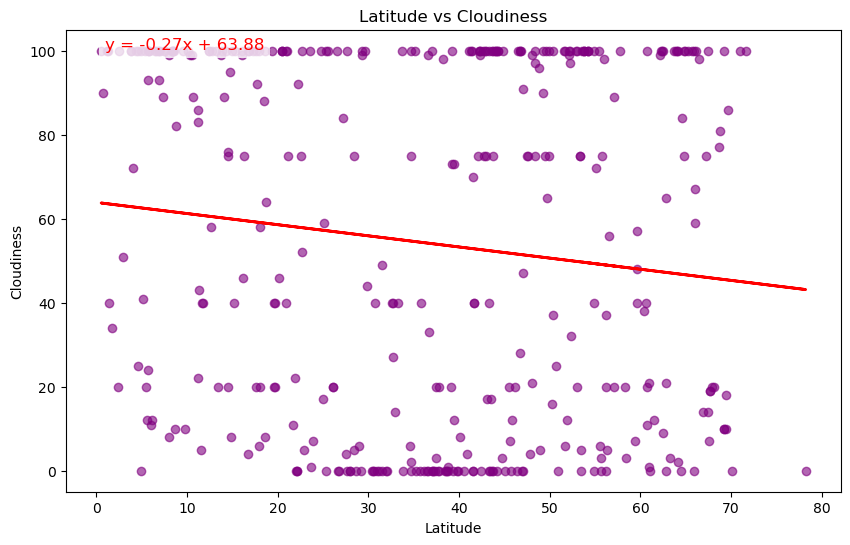

In [81]:
# Linear regression Humidity and Cloudiness on the Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

# Performing linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(slope_text, 
             xy=(0.05, 0.95),  
             xycoords='axes fraction', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             ha='left', 
             va='bottom')

# Show the plot
plt.show()

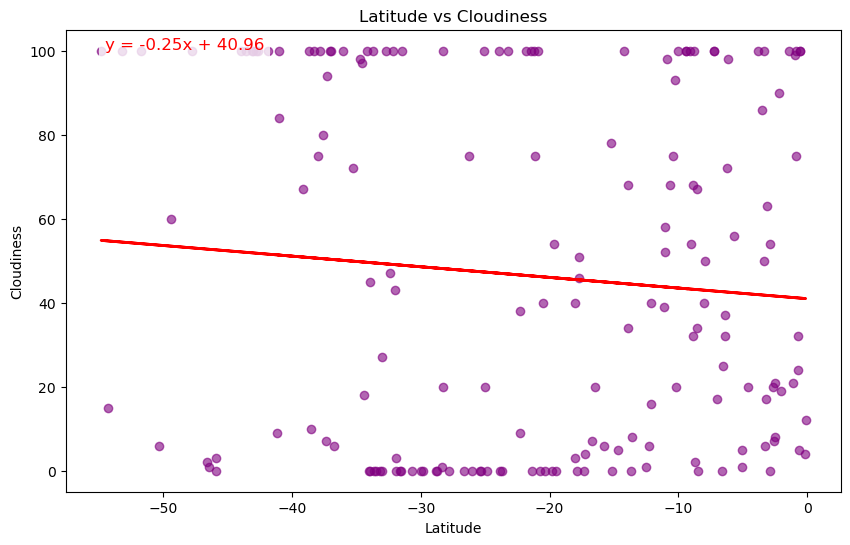

In [83]:
# Linear regression Humidity and Cloudiness on the Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# Performing linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(slope_text, 
             xy=(0.05, 0.95),  
             xycoords='axes fraction', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             ha='left', 
             va='bottom')
# The r^2-value is: 0.018616831531634456

# Show the plot
plt.show()

**Discussion about the linear relationship:** Similar to the relationship between latitude and humidity, there doesn't appear to be a strong correlation among cities included in this dataframe, particularly cities located in the Southern hemisphere. However, cities located in the Northern hemisphere appear to have a stronger negative correlation, especially as you move further away from the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

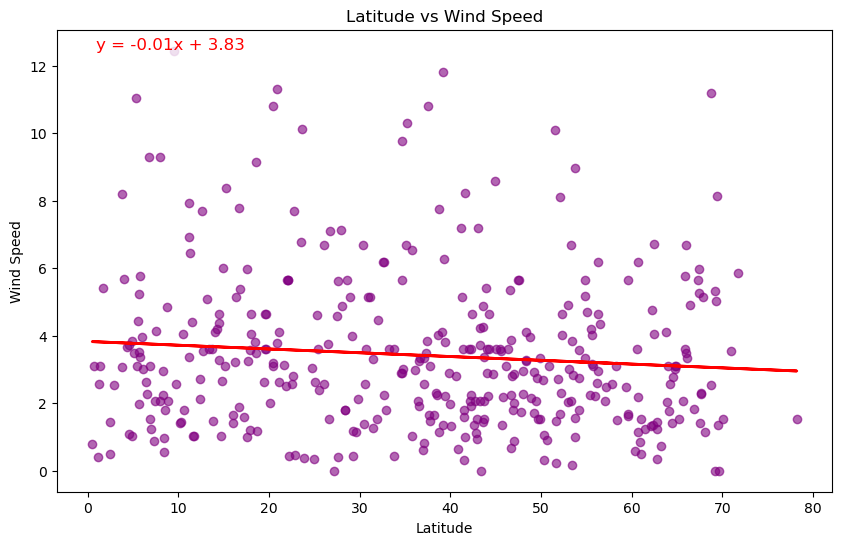

In [84]:
# Linear regression Humidity and Wind Speed on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

# Performing linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(slope_text, 
             xy=(0.05, 0.95),  
             xycoords='axes fraction', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             ha='left', 
             va='bottom')

# The r^2-value is: 0.0017236249523139959

# Show the plot
plt.show()

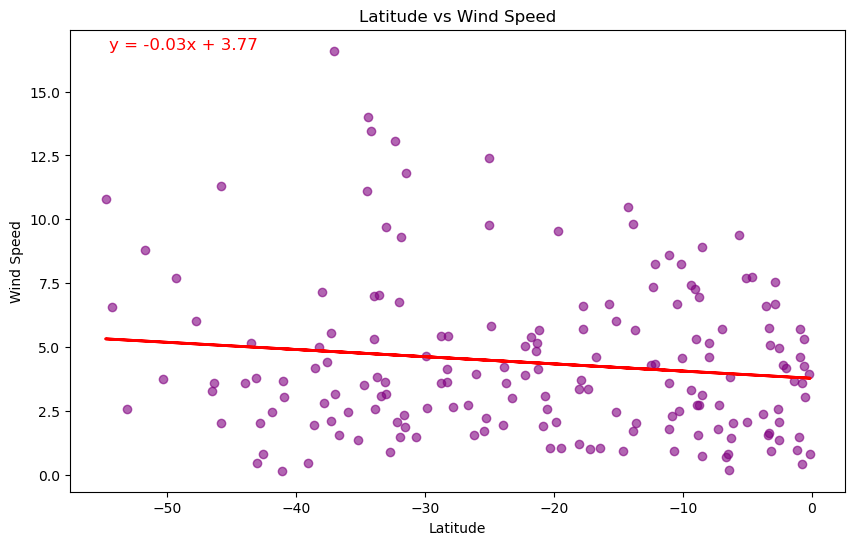

In [86]:
# Linear regression Humidity and Wind Speed on the Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

# Performing linear regression and calculating the predicted values
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
y_pred = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='purple', label='Data points', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Adding the slope formula text to the graph
slope_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(slope_text, 
             xy=(0.05, 0.95),  
             xycoords='axes fraction', 
             fontsize=12, 
             color='red', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
             ha='left', 
             va='bottom')

#The r^2-value is: 0.06495869418886388

# Show the plot
plt.show()

**Discussion about the linear relationship:** Based on the above scatter plots, it looks like there is a slight negative correlation among cities in both the Northern and Southern hemisphere regarding latitude and wind speeds. The consistency between both the Northern and Southern hemisphere seems odd since one chart is moving further from the equator while the latter chart moves closer towards the equator but the slight nature of the correlation could be an indication that there isn't a significant impact caused by location.  